## Women's Ecommerce Clothing Reviews

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read and check the data frame

reviews = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
reviews.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [70]:
# Looking for the average age of the consumer

reviews["Age"].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

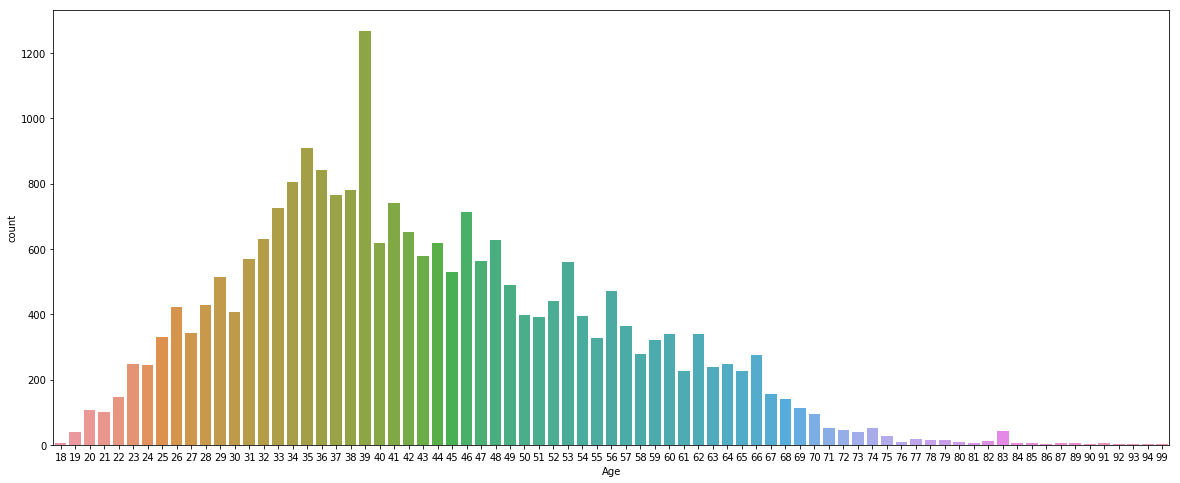

In [4]:
# Although the average age is is 43, our count plot shows 43 year old women have written the most reviews.

plt.figure(figsize=(20,8)) # this creates a figure 20 inch wide, 8 inch high
sns.countplot(x= reviews["Age"], data = reviews)
plt.show()

In [71]:
# Created a dataframe based of age and rating which will be used later to find trends and predictions

age_review = reviews[["Age", "Rating"]]
age_review.head()

,Age,Rating
0,33,4
1,34,5
2,60,3
3,50,5
4,47,5


## Question 1: Can we predict rating based on the type of clothing?

## Linear Regression

In [45]:
# Preprocess the data since we have a categorical value

# data = reviews.values
X = reviews["Rating"].values.reshape(-1, 1)
y = reviews["Class Name"].values.reshape(-1, 1)

# X = reviews["Age"].values.reshape(-1, 1)
# y = reviews["Rating"].values.reshape(-1, 1)

In [46]:

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Step 1: Label-encode data set

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(reviews['Class Name'].astype(str)) ## Needed to make sure all rows had a string to transform the column
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [47]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.00018613791074806318
Testing Score: 0.0006192282725197007


### Based on the training & testing scores, linear regression will not be used. We will now try logistic regression

## Logistic Regression

In [64]:
# Multivariate regression. Looking to see if there are more factors in play then what we had below

X = reviews[["Class Name", "Age"]]
y = reviews["Rating"]

In [72]:
# Import Logistic Regression from scikit-learn

from sklearn.linear_model  import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.26796866129215396
Testing Data Score: 0.2723092643051771


## We've recieved a better score, but not as high as we want it to. The next section will involve NLP to see if the review text can predict the rating.

In [68]:
# # LASSO model# LASSO  

# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Lasso

# ### BEGIN SOLUTION
# lasso = Lasso(alpha=.01).fit(X_train, y_train)

# predictions = lasso.predict(X_test)

# MSE = mean_squared_error(y_test, predictions)
# r2 = lasso.score(X_test, y_test)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

MSE: 27.079815221366896, R2: 0.0005406087163749573


# NLP Portion

In [15]:
reviews_nonull = reviews.dropna()
reviews_nonull.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [73]:
# Created a text length column by creating a new column and requested that it show the length of review's text.

reviews_nonull['text length'] = reviews_nonull['Review Text'].apply(len)

C:\Users\JBTD9\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
reviews_nonull.head(1)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text length
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500


## Explore dataset for NLP

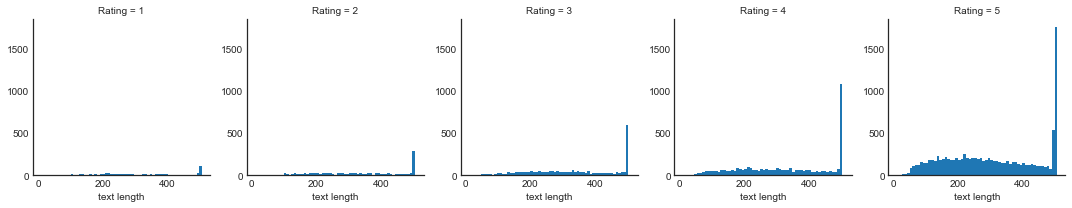

In [18]:
sns.set_style("white")
g = sns.FacetGrid(reviews_nonull, col='Rating')
g.map(plt.hist, 'text length' , bins = 60)

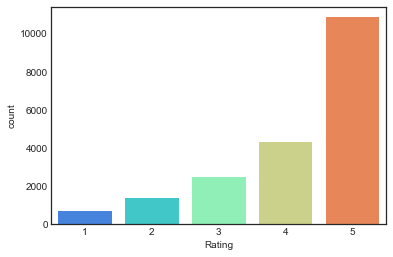

In [19]:
sns.countplot(x='Rating',data=reviews_nonull,palette='rainbow')

In [20]:
review_class = reviews_nonull[(reviews_nonull.Rating == 1) | (reviews_nonull.Rating == 2) | (reviews_nonull.Rating == 3) | 
                              (reviews_nonull.Rating == 4) | (reviews_nonull.Rating == 5)]

In [21]:
X =  review_class['Review Text']
y = review_class['Rating']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [23]:
X = cv.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)


from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

## Predictions

In [75]:
# Used the predict method off of nb to predict labels from the X_test

nb.fit(X_train,y_train)
predictions = nb.predict(X_test)

predict = pd.DataFrame(predictions) 
actual = pd.DataFrame(reviews["Rating"])

predictions = pd.concat([predict, actual], axis = 1)
predictions.head(9)

,0,Rating
0,3.0,4
1,3.0,5
2,3.0,3
3,3.0,5
4,3.0,5
5,3.0,2
6,3.0,5
7,3.0,4
8,3.0,5


In [33]:
print(predictions[0:10])


     0  Rating
0  5.0       4
1  5.0       5
2  3.0       3
3  5.0       5
4  3.0       5
5  5.0       2
6  3.0       5
7  3.0       4
8  5.0       5
9  5.0       5


In [35]:
print("The model was correct: " + (str(float(26272/98548))) + " percent of the time.")

The model was correct: 0.2665908998660551 percent of the time.


## Random Forest Model

In [78]:
reviews.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
predictions = dtree.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       743
          2       0.00      0.00      0.00         1
          3       0.27      1.00      0.43      1599
          4       0.00      0.00      0.00       271
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00       168
          7       0.00      0.00      0.00       270
          8       0.00      0.00      0.00      1244
          9       0.00      0.00      0.00        30
         10       0.00      0.00      0.00        38
         11       0.00      0.00      0.00       163
         12       0.00      0.00      0.00        86
         13       0.00      0.00      0.00       364
         14       0.00      0.00      0.00        86
         15       0.00      0.00      0.00       230
         16       0.00      0.00      0.00        68
         17       0.00      0.00      0.00       367
         18       0.00      0.00      0.00   

C:\Users\JBTD9\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
rfc_predict = rfc.predict(X_test)

In [88]:
print(classification_report(y_test,rfc_predict))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       743
          2       0.00      0.00      0.00         1
          3       0.27      1.00      0.43      1599
          4       0.00      0.00      0.00       271
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00       168
          7       0.00      0.00      0.00       270
          8       0.00      0.00      0.00      1244
          9       0.00      0.00      0.00        30
         10       0.00      0.00      0.00        38
         11       0.00      0.00      0.00       163
         12       0.00      0.00      0.00        86
         13       0.00      0.00      0.00       364
         14       0.00      0.00      0.00        86
         15       0.00      0.00      0.00       230
         16       0.00      0.00      0.00        68
         17       0.00      0.00      0.00       367
         18       0.00      0.00      0.00   

C:\Users\JBTD9\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
